In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns

### Using iris databse

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.petal_length

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
5      1.7
6      1.4
7      1.5
8      1.4
9      1.5
10     1.5
11     1.6
12     1.4
13     1.1
14     1.2
15     1.5
16     1.3
17     1.4
18     1.7
19     1.5
20     1.7
21     1.5
22     1.0
23     1.7
24     1.9
25     1.6
26     1.6
27     1.5
28     1.4
29     1.6
30     1.6
31     1.5
32     1.5
33     1.4
34     1.5
35     1.2
36     1.3
37     1.4
38     1.3
39     1.5
40     1.3
41     1.3
42     1.3
43     1.6
44     1.9
45     1.4
46     1.6
47     1.4
48     1.5
49     1.4
50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4

#### 1. What does the distribution of petal lengths look like?

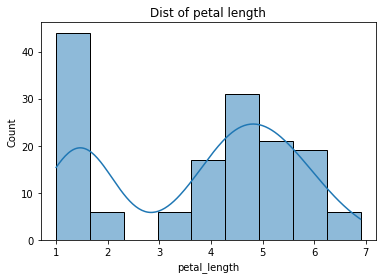

In [4]:
sns.histplot(iris.petal_length, kde=True)
plt.title('Dist of petal length')
plt.show()

We see that the petal lengths of the flowers returns a bimodal distribution. We cannot make any inferences from this result.

#### 2. Is there a correlation between petal length and petal width?

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

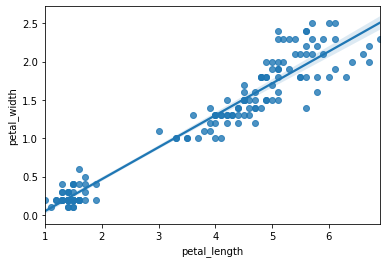

In [5]:
sns.regplot(x=iris['petal_length'], y=iris['petal_width'])

From the slope of the line, we can see that both petal length and width have a strong positive correlation.

#### 3. Would it be reasonable to predict species based on sepal width and sepal length?

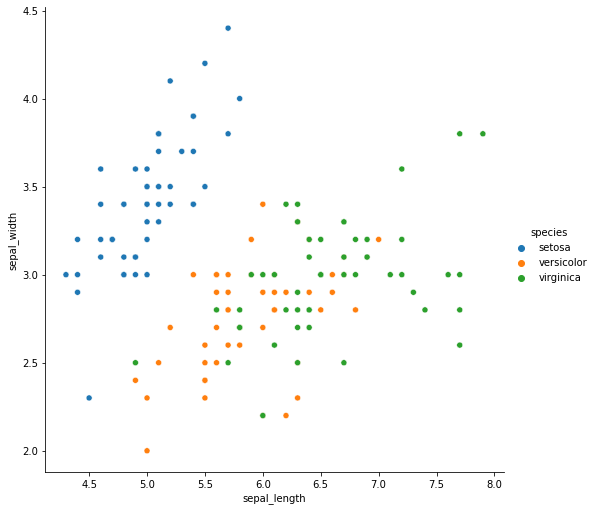

In [6]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris, height=7, aspect=1)

From the plot above, we see there is too much overlap between sepal lengths and widths within all three species to accurately predict species.

#### 4. Which features would be best used to predict species?

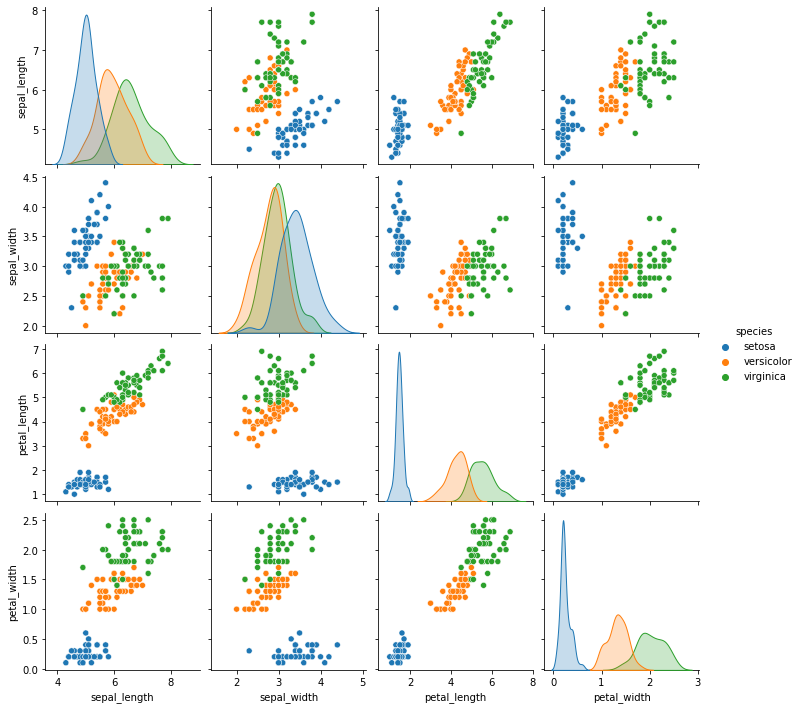

In [7]:
sns.pairplot(iris, hue="species")

The two best features to predict species are petal width and then petal length.

### Part 2

#### 1.Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
#### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [8]:
anscombe = sns.load_dataset('anscombe')

In [9]:
anscombe.groupby('dataset').agg(['mean', 'min', 'max', 'sum', 'std'])

x                                    y                      \
        mean  min   max   sum       std      mean   min    max    sum   
dataset                                                                 
I        9.0  4.0  14.0  99.0  3.316625  7.500909  4.26  10.84  82.51   
II       9.0  4.0  14.0  99.0  3.316625  7.500909  3.10   9.26  82.51   
III      9.0  4.0  14.0  99.0  3.316625  7.500000  5.39  12.74  82.50   
IV       9.0  8.0  19.0  99.0  3.316625  7.500909  5.25  12.50  82.51   

                   
              std  
dataset            
I        2.031568  
II       2.031657  
III      2.030424  
IV       2.030579

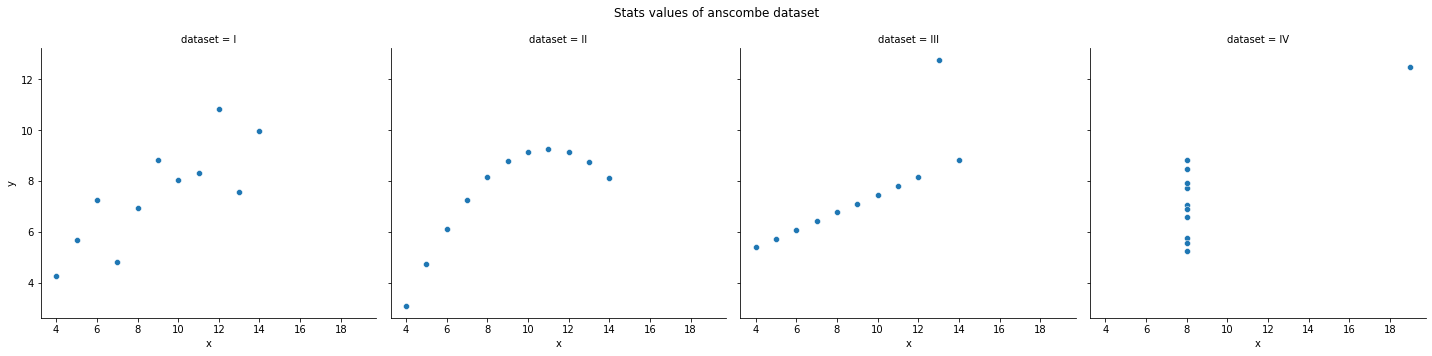

In [10]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset')
plt.suptitle('Stats values of anscombe dataset')
plt.tight_layout()
plt.show()

#### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [11]:
insectsprays = data('InsectSprays')

In [12]:
insectsprays

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


<AxesSubplot:xlabel='count', ylabel='spray'>

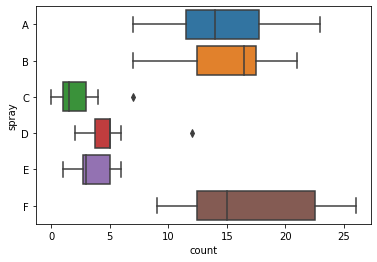

In [13]:
sns.boxplot(data=insectsprays, x='count', y='spray')

### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [14]:
swiss = data('swiss')
swiss = pd.DataFrame(swiss)
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


#### a. create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [15]:
swiss['is_catholic'] = swiss.Catholic >= 50
#province is catholic if Catholic is greater or equal to 50

In [16]:
swiss
#shows dataset with new is_catholic column

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


#### b. Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

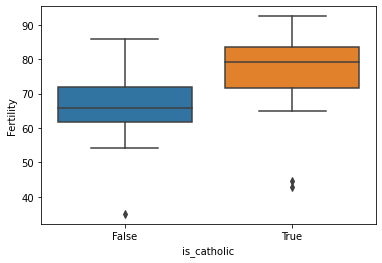

In [17]:
sns.boxplot(y='Fertility', x='is_catholic', data=swiss)

We see that fertility is higher overall in Catholic provinces.

#### c. What measure correlates most strongly with fertility?

<AxesSubplot:xlabel='Fertility', ylabel='Catholic'>

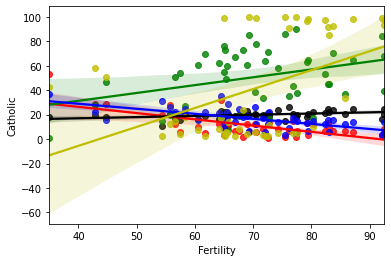

In [18]:
sns.regplot(x=swiss['Fertility'], y=swiss['Education'], color="r")
sns.regplot(x=swiss['Fertility'], y=swiss['Infant.Mortality'], color="k")
sns.regplot(x=swiss['Fertility'], y=swiss['Agriculture'], color="g")
sns.regplot(x=swiss['Fertility'], y=swiss['Examination'], color="b")
sns.regplot(x=swiss['Fertility'], y=swiss['Catholic'], color="y")

The strongest correlation of a province's fertility rate is strongest correlated to its Catholic population.

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [2]:
from env import host, user, password
def get_db_url(user, password, host, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
url = get_db_url(user, password, host, 'chipotle')
orders = pd.read_sql('SELECT * FROM orders', url)
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [10]:
top_items = orders.groupby('item_name').quantity.agg(['sum']).sort_values('sum', ascending=False).head(4)
#find top 4 items

only_top_items = orders.merge(top_items, on='item_name', how='right')
# merge tables

only_top_items = only_top_items.assign(item_price_tot=only_top_items['item_price'].str.strip('$').astype(float))
#change prices to floats for summation

only_top_items.drop(columns=['item_price'])
#remove old price column

#only_top_items = pd.DataFrame(only_top_items.groupby('item_name').item_price_tot.sum().sort_values().tail(4))
only_top_items = only_top_items.groupby('item_name', ).item_price_tot.sum().sort_values().tail(4)

#only_top_items['index'] = top_items
#only_top_items = only_top_items.sort_values('index')
only_top_items

item_name
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Chicken Burrito        5575.82
Chicken Bowl           7342.73
Name: item_price_tot, dtype: float64

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(data=only_top_items, x='item_name')
plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'item_name'

<Figure size 720x432 with 0 Axes>

In [108]:
only_top_items.groupby('item_name').item_price_tot.agg(['sum'])

,sum
item_name,
Chicken Bowl,263175
Chicken Burrito,554106
Chips and Guacamole,727122
Steak Burrito,714472


In [33]:
orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(4)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [ ]:
pd.concat([tot_price, top_items], axis=1)

In [ ]:
sns.histplot(order['item_name'])

#### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [22]:
sleepstudy = data('sleepstudy')

In [23]:
avg_reaction = sleepstudy.copy()
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [29]:
sleepy = sleepstudy.pivot_table(index='Days', columns='Subject', values='Reaction')
sleepy
#create pivot table grouped by days to show patients' each reaction times through the experiment

Subject,308,309,310,330,331,332,333,334,335,337,349,350,351,352,369,370,371,372
Days,,,,,,,,,,,,,,,,,,
0,249.5600,222.7339,199.0539,321.5426,287.6079,234.8606,283.8424,265.4731,241.6083,312.3666,236.1032,256.2968,250.5265,221.6771,271.9235,225.2640,269.8804,269.4117
1,258.7047,205.2658,194.3322,300.4002,285.0000,242.8118,289.5550,276.2012,273.9472,313.8058,230.3167,243.4543,300.0576,298.1939,268.4369,234.5235,272.4428,273.4740
2,250.8006,202.9778,234.3200,283.8565,301.8206,272.9613,276.7693,243.3647,254.4907,291.6112,238.9256,256.2046,269.8939,326.8785,257.2424,238.9008,277.8989,297.5968
3,321.4398,204.7070,232.8416,285.1330,320.1153,309.7688,299.8097,254.6723,270.8021,346.1222,254.9220,255.5271,280.5891,346.8555,277.6566,240.4730,281.7895,310.6316
4,356.8519,207.7161,229.3074,285.7973,316.2773,317.4629,297.1710,279.0244,251.4519,365.7324,250.7103,268.9165,271.8274,348.7402,314.8222,267.5373,279.1705,287.1726
5,414.6901,215.9618,220.4579,297.5855,293.3187,309.9976,338.1665,284.1912,254.6362,391.8385,269.7744,329.7247,304.6336,352.8287,317.2135,344.1937,284.5120,329.6076
6,382.2038,213.6303,235.4208,280.2396,290.0750,454.1619,332.0265,305.5248,245.4523,404.2601,281.5648,379.4445,287.7466,354.4266,298.1353,281.1481,259.2658,334.4818
7,290.1486,217.7272,255.7511,318.2613,334.8177,346.8311,348.8399,331.5229,235.3110,416.6923,308.1020,362.9184,266.5955,360.4326,348.1229,347.5855,304.6306,343.2199
8,430.5853,224.2957,261.0125,305.3495,293.7469,330.3003,333.3600,335.7469,235.7541,455.8643,336.2806,394.4872,321.5418,375.6406,340.2800,365.1630,350.7807,369.1417


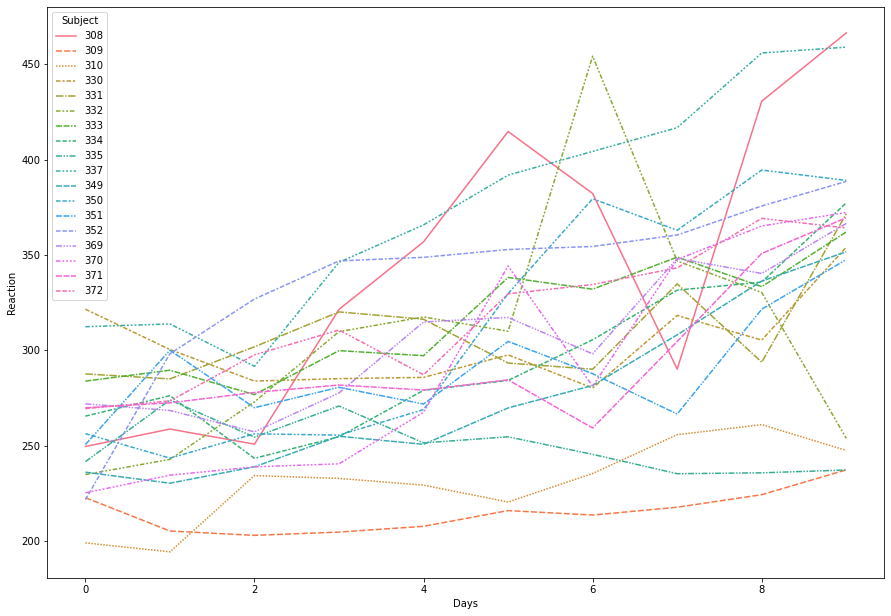

In [32]:
plt.figure(figsize=(15,10.5))
sns.lineplot(data=sleepy, legend="full")
plt.ylabel('Reaction')
plt.show()
#Create line plot showing different subject's anf their reaction on specific days

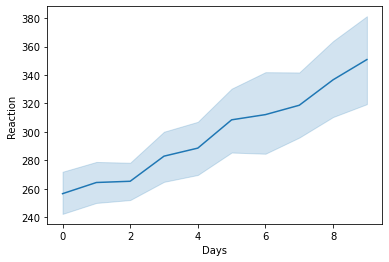

In [36]:
sns.lineplot(data=sleepstudy, x = 'Days', y = 'Reaction', estimator='mean')
plt.show()
#Create line chart showing subjects' cumulative avg reaction

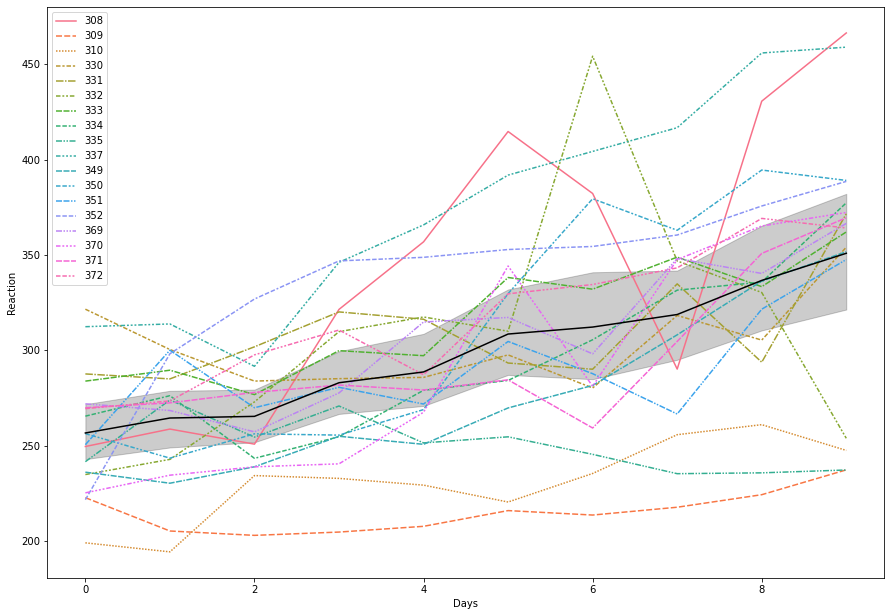

In [34]:
plt.figure(figsize=(15,10.5))

sns.lineplot(data=sleepy, legend="full")
sns.lineplot(data=sleepstudy, x = 'Days', y = 'Reaction', color='k')

plt.ylabel('Reaction')
plt.show()